# 01. Neural Network Regression with TensorFlow

In [ ]:
#Lets import 
import tensorflow as tf
print(tf.__version__)

2.8.0


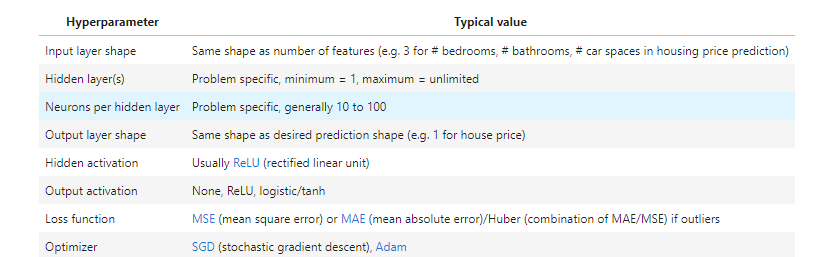


Source: Adapted from page 293 of Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron

In this notebook, we will build a neural network using the Boston Housing Dataset from :https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data 

#Load Data

 Variables in order:
 - CRIM     per capita crime rate by town
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS    proportion of non-retail business acres per town
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      nitric oxides concentration (parts per 10 million)
 - RM       average number of rooms per dwelling
 - AGE      proportion of owner-occupied units built prior to 1940
 - DIS      weighted distances to five Boston employment centres
 - RAD      index of accessibility to radial highways
 - TAX      full-value property-tax rate per 10,000 dollars
 - PTRATIO  pupil-teacher ratio by town
 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT    % lower status of the population
 - MEDV     Median value of owner-occupied homes in $1000's




In [ ]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=113)

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(404, 404, 102, 102)

In [ ]:
X_train.shape, y_train.shape

((404, 13), (404,))

### Lets visualize the data by turning it into a pandas dataframe

In [ ]:
X_train[0], y_train[0]

(array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ]), 15.2)

In [ ]:
import numpy as np
np.mean(y_train)

22.395049504950492

In [ ]:
np.max(y_train)

50.0

# Steps in Modeling with Tensorflow

Using the Sequential API we will follow these steps to build a model

- Creating a model - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
- Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
- Fitting a model - letting the model try to find patterns in the data (how does X get to y).

In [ ]:
#set random seed
tf.random.set_seed(42)

#create a model using the sequential API
model_1=tf.keras.Sequential([
  tf.keras.layers.Dense(1)                        
])

#compile
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.SGD())

#FIT
model_1.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
#check and save results for later
test_results={}
test_results['model_1']=model_1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 830.8780


#Normalization

In [ ]:
X_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [ ]:
#let view it as a dataframe
import pandas as pd
x_train_df=pd.DataFrame(X_train)
x_train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


In [ ]:
x_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,404.0,3.745111,9.240734,0.00632,0.081437,0.26888,3.674808,88.9762
1,404.0,11.480198,23.767711,0.00000,0.000000,0.00000,12.500000,100.0000
2,404.0,11.104431,6.811308,0.46000,5.130000,9.69000,18.100000,27.7400
3,404.0,0.061881,0.241238,0.00000,0.000000,0.00000,0.000000,1.0000
4,404.0,0.557356,0.117293,0.38500,0.453000,0.53800,0.631000,0.8710
5,404.0,6.267082,0.709788,3.56100,5.874750,6.19850,6.609000,8.7250
6,404.0,69.010644,27.940665,2.90000,45.475000,78.50000,94.100000,100.0000
7,404.0,3.740271,2.030215,1.12960,2.077100,3.14230,5.118000,10.7103
8,404.0,9.440594,8.698360,1.00000,4.000000,5.00000,24.000000,24.0000
9,404.0,405.898515,166.374543,188.00000,279.000000,330.00000,666.000000,711.0000


In [ ]:
#let normalized our data
normalizer=tf.keras.layers.Normalization(axis=1)
#fit the layer
normalizer.adapt(X_train)

In [ ]:
#calcualte the mean normalizered layer
print(normalizer.mean.numpy())

[[3.7451105e+00 1.1480199e+01 1.1104430e+01 6.1881185e-02 5.5735594e-01
  6.2670808e+00 6.9010635e+01 3.7402709e+00 9.4405937e+00 4.0589847e+02
  1.8475994e+01 3.5478317e+02 1.2740816e+01]]


In [ ]:
#lets compare the original vs normalized arrat
with np.printoptions(precision=2, suppress=True):
  print('First example', X_train[:1])
  print()
  print('Normalized:', normalizer(X_train[:1]))

First example [[  1.23   0.     8.14   0.     0.54   6.14  91.7    3.98   4.   307.
   21.   396.9   18.72]]

Normalized: tf.Tensor(
[[-0.27 -0.48 -0.44 -0.26 -0.17 -0.18  0.81  0.12 -0.63 -0.6   1.15  0.45
   0.83]], shape=(1, 13), dtype=float32)


#build another model with normalized data

In [ ]:
#build
model_2=tf.keras.Sequential([
  normalizer,
  tf.keras.layers.Dense(1)
])

#compile
model_2.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

#fit
model_2.fit(X_train, y_train, epochs=100, verbose=0 )


In [ ]:
#check and save results for later
test_results['model_2']=model_2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 21.7432


In [ ]:
#lets try to improve the model
#build
model_3=tf.keras.Sequential([
  normalizer,
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

#compile
model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

#fit
model_3.fit(X_train, y_train, epochs=200, verbose=0 )

In [ ]:
#check and save results for later
test_results['model_3']=model_3.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 3.1388


# Performance


In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error']).T

,Mean absolute error
model_1,830.877991
model_2,21.743200
model_3,3.138830


In [ ]:
#let save model_3
model_3.save('Boston_Housing_Model')

INFO:tensorflow:Assets written to: Boston_Housing_Model/assets
